<a href="https://colab.research.google.com/github/Al-Amin134/Artificial-Intelligence-Lab-4-1-/blob/main/group_dataset/garlic_onion_dataset(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
zip_file_path = '/content/dataset3.zip'
extract_dir = '/content/sample_data/garlic_and_onion_2'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files and folders inside the extracted directory
extracted_files = os.listdir(extract_dir)
print(extracted_files)



['dataset']


In [ ]:
train_dir = '/content/sample_data/garlic_and_onion_2/dataset/train'
test_dir = '/content/sample_data/garlic_and_onion_2/dataset/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Data loading
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 912 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Model Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Model Training
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=10,
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size
)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6395 - loss: 0.8338 - val_accuracy: 0.5052 - val_loss: 0.5870
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.9062 - loss: 0.2170 - val_accuracy: 0.5885 - val_loss: 0.5061
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8825 - loss: 0.2199 - val_accuracy: 0.8594 - val_loss: 0.2758
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9688 - loss: 0.0739 - val_accuracy: 0.8490 - val_loss: 0.3654
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9763 - loss: 0.0799 - val_accuracy: 0.9948 - val_loss: 0.0305
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 1.0000 - loss: 0.0258 - val_accuracy: 0.9792 - val_loss: 0.0424
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9613 - loss: 0.1282 - val_accuracy: 0.7865 - val_loss: 0.3624
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9375 - loss: 0.1080 - val_accuracy: 0.7552 - val

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.9811 - loss: 0.0993
Test accuracy: 98.00%


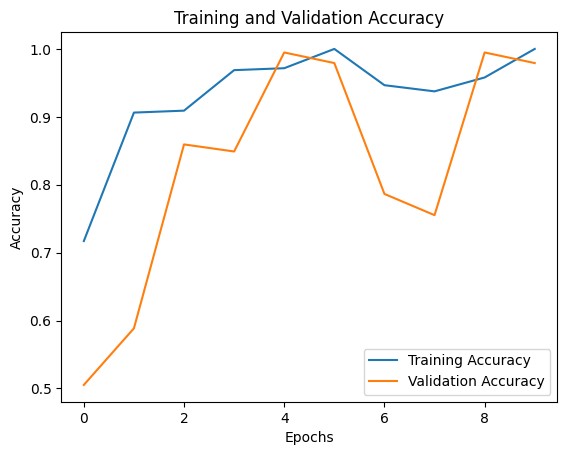

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: Onion


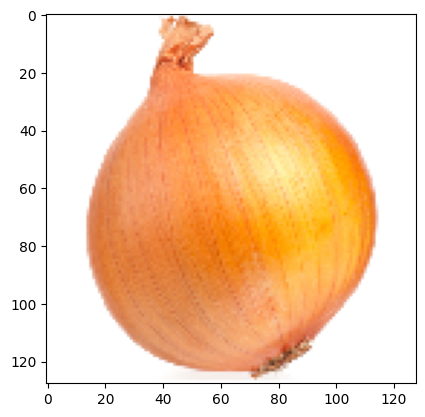

In [ ]:
#Loading New Image and Predict

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/sample_data/onion.png'
img = image.load_img(img_path, target_size=(128, 128))


img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

if prediction[0] > 0.5:
    print("Predicted class: Onion")
else:
    print("Predicted class: Garlic")
plt.imshow(img)
